## Basic Example

In [1]:
!pip install qiskit qiskit_ionq matplotlib pylatexenc

In [2]:
from qiskit import QuantumCircuit
import qiskit_ionq

from getpass import getpass

# get your API key from https://cloud.ionq.com/settings/keys
api_key = getpass('Enter your IonQ API key: ')
provider = qiskit_ionq.IonQProvider(api_key)
backend = provider.get_backend('ionq_simulator')

In [3]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()

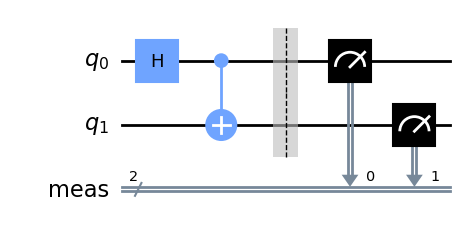

In [4]:
qc.draw('mpl')

In [5]:
job = backend.run(qc)
print(job.result().get_counts())

{'00': 494, '11': 530}


## Advanced Example

In [6]:
from qiskit import transpile
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT
from qiskit_ionq import ErrorMitigation
from math import pi

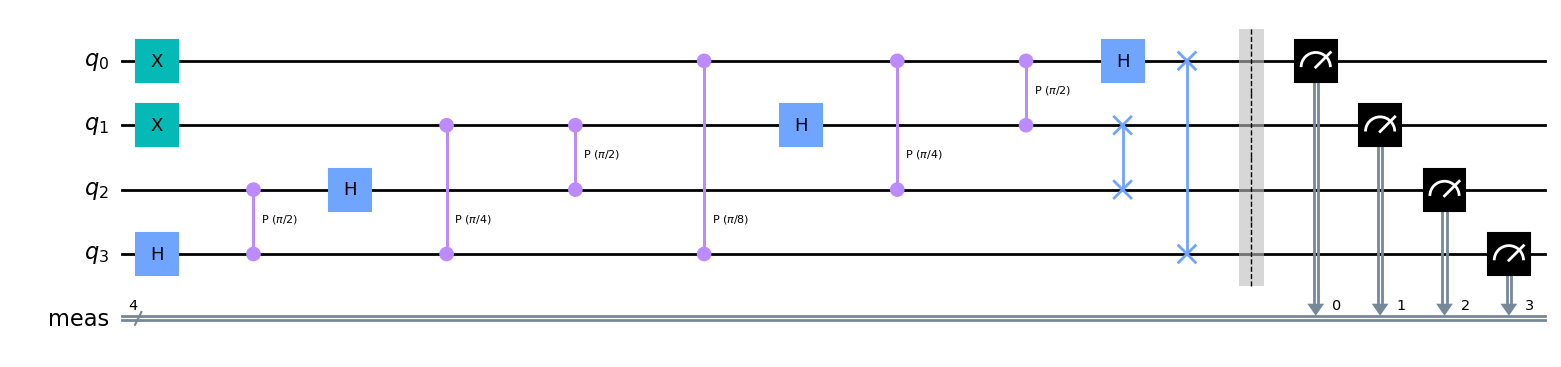

In [7]:
num_qubits = 4
qc_adv = QuantumCircuit(num_qubits, name='QFT Example')
qc_adv.x(range(num_qubits // 2))
qc_adv.append(QFT(
    num_qubits=num_qubits,
    approximation_degree=0,
    do_swaps=True,
    inverse=False,
    insert_barriers=False,
    name='qft'), range(num_qubits))
qc_adv.measure_all()
qc_adv = transpile(qc_adv, backend) # decompose qft into gates
qc_adv.draw('mpl')

/opt/homebrew/anaconda3/lib/python3.11/site-packages/qiskit_ionq/ionq_backend.py:374: UserWarning: Option error_mitigation is not used by this backend
  return super().run(circuit, **kwargs)


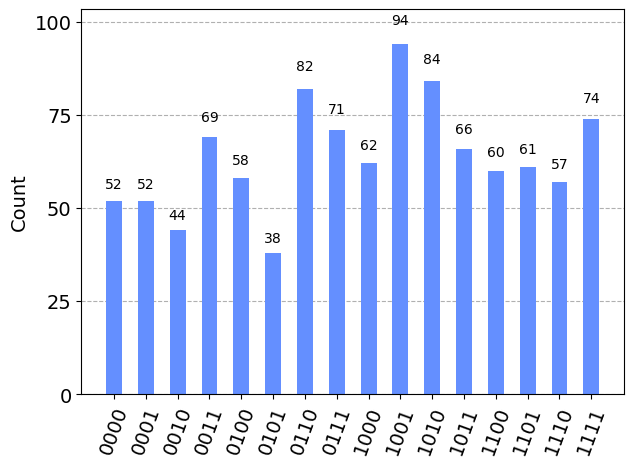

In [8]:
job_adv = backend.run(
    qc_adv,
    noise_model='harmony',
    error_mitigation=ErrorMitigation.DEBIASING,
)
plot_histogram(job_adv.result(sharpen=True).get_counts())